<a href="https://colab.research.google.com/github/AryanBhardwajIndia/Cricket-World-Cup-Score-Predictor-Using-Linear-Regression/blob/main/cricket_score_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

# Load the file, skipping comment and blank lines
file_path = 'cricket_worldcup_scores.csv'  # Update this path as needed
df = pd.read_csv(file_path, skiprows=3)

# Drop completely empty rows
df.dropna(how='all', inplace=True)

# Forward-fill missing YEAR values and then backfill any remaining at the beginning
df['YEAR'].fillna(method='ffill', inplace=True)
df['YEAR'].fillna(method='bfill', inplace=True) # Backfill to handle missing values at the beginning

# Convert appropriate columns to numeric types
# Convert 'YEAR' to integers, replacing non-finite values with a placeholder (e.g., -1)
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce').fillna(-1).astype(int)
df['RUNS SCORED'] = pd.to_numeric(df['RUNS SCORED'], errors='coerce')
df['WICKETS LOST'] = pd.to_numeric(df['WICKETS LOST'], errors='coerce')
df['WICKETS TAKEN'] = pd.to_numeric(df['WICKETS TAKEN'], errors='coerce')

# Save the cleaned data
df.to_csv('cleaned_cricket_worldcup_scores.csv', index=False)

<ipython-input-8-8c344272df19>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YEAR'].fillna(method='ffill', inplace=True)
<ipython-input-8-8c344272df19>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['YEAR'].fillna(method='ffill', inplace=True)
<ipython-input-8-8c344272df19>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will ch

In [14]:
import pandas as pd

# Load the cleaned file
df = pd.read_csv('cleaned_cricket_worldcup_scores.csv')

# Forward-fill 'TEAM' column only for rows from 1987 onwards
mask = df['YEAR'] >= 1987
df.loc[mask, 'TEAM'] = df.loc[mask, 'TEAM'].fillna(method='ffill')

# Save the updated file
df.to_csv('cleaned_cricket_worldcup_scores_fixed_teams.csv', index=False)


<ipython-input-14-331802d7375e>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[mask, 'TEAM'] = df.loc[mask, 'TEAM'].fillna(method='ffill')


In [15]:
df

,YEAR,TEAM,RUNS SCORED,WICKETS LOST,WICKETS TAKEN,AGAINST,RESULT,VENUE,WINNER
0,1975,AUS,278.0,7.0,10.0,PAK,WON,LEEDS,WEST INDIES
1,1975,AUS,328.0,5.0,4.0,SL,WON,LONDON,NaN
2,1975,AUS,192.0,10.0,3.0,WI,LOST,LONDON,NaN
3,1975,AUS,94.0,6.0,10.0,ENG,WON,LEEDS,NaN
4,1975,AUS,274.0,10.0,8.0,WI,LOST,LONDON,NaN
...,...,...,...,...,...,...,...,...,...
901,2019,IND,268.0,7.0,10.0,WI,WON,MANCHESTER,NaN
902,2019,IND,306.0,5.0,7.0,ENG,WON,BIRMINGHAM,NaN
903,2019,IND,314.0,9.0,10.0,BAN,WON,BIRMINGHAM,NaN
904,2019,IND,265.0,3.0,7.0,SL,WON,LEEDS,NaN


In [16]:
df = df[["YEAR", "TEAM", "RUNS SCORED", "WICKETS LOST", "WICKETS TAKEN"]]

In [17]:
df

,YEAR,TEAM,RUNS SCORED,WICKETS LOST,WICKETS TAKEN
0,1975,AUS,278.0,7.0,10.0
1,1975,AUS,328.0,5.0,4.0
2,1975,AUS,192.0,10.0,3.0
3,1975,AUS,94.0,6.0,10.0
4,1975,AUS,274.0,10.0,8.0
...,...,...,...,...,...
901,2019,IND,268.0,7.0,10.0
902,2019,IND,306.0,5.0,7.0
903,2019,IND,314.0,9.0,10.0
904,2019,IND,265.0,3.0,7.0


In [18]:
df.dropna()

,YEAR,TEAM,RUNS SCORED,WICKETS LOST,WICKETS TAKEN
0,1975,AUS,278.0,7.0,10.0
1,1975,AUS,328.0,5.0,4.0
2,1975,AUS,192.0,10.0,3.0
3,1975,AUS,94.0,6.0,10.0
4,1975,AUS,274.0,10.0,8.0
...,...,...,...,...,...
901,2019,IND,268.0,7.0,10.0
902,2019,IND,306.0,5.0,7.0
903,2019,IND,314.0,9.0,10.0
904,2019,IND,265.0,3.0,7.0


In [19]:
df

,YEAR,TEAM,RUNS SCORED,WICKETS LOST,WICKETS TAKEN
0,1975,AUS,278.0,7.0,10.0
1,1975,AUS,328.0,5.0,4.0
2,1975,AUS,192.0,10.0,3.0
3,1975,AUS,94.0,6.0,10.0
4,1975,AUS,274.0,10.0,8.0
...,...,...,...,...,...
901,2019,IND,268.0,7.0,10.0
902,2019,IND,306.0,5.0,7.0
903,2019,IND,314.0,9.0,10.0
904,2019,IND,265.0,3.0,7.0


In [24]:
df.dropna(inplace=True)

# Reset the index to make it continuous
df.reset_index(drop=True, inplace=True)

# Save the fully cleaned file
df.to_csv('cleaned_cricket_worldcup_scores_final.csv', index=False)

<ipython-input-24-ff4cebe67fdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [25]:
df

,YEAR,TEAM,RUNS SCORED,WICKETS LOST,WICKETS TAKEN
0,1975,AUS,278.0,7.0,10.0
1,1975,AUS,328.0,5.0,4.0
2,1975,AUS,192.0,10.0,3.0
3,1975,AUS,94.0,6.0,10.0
4,1975,AUS,274.0,10.0,8.0
...,...,...,...,...,...
868,2019,IND,268.0,7.0,10.0
869,2019,IND,306.0,5.0,7.0
870,2019,IND,314.0,9.0,10.0
871,2019,IND,265.0,3.0,7.0


In [27]:
numeric_cols = ["RUNS SCORED", "WICKETS LOST", "WICKETS TAKEN"]
df.loc[:, numeric_cols].corr()["RUNS SCORED"]

,RUNS SCORED
RUNS SCORED,1.000000
WICKETS LOST,-0.090555
WICKETS TAKEN,0.230246


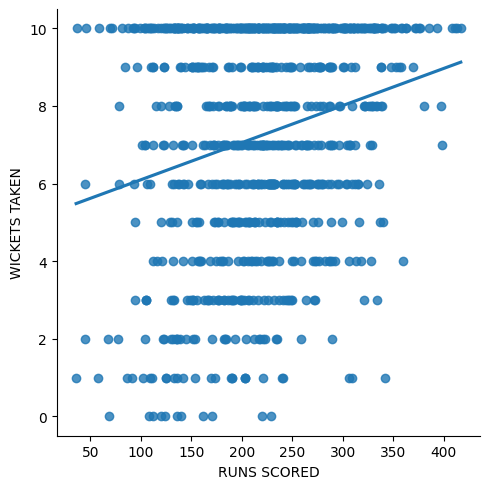

In [28]:
import seaborn as sns
sns.lmplot(x="RUNS SCORED", y = "WICKETS TAKEN", data=df, fit_reg=True, ci=None)

In [30]:
train = df[df["YEAR"]< 2011].copy()
test = df[df["YEAR"]>= 2011].copy()

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [31]:
predictors = ["WICKETS TAKEN", "WICKETS LOST"]
reg.fit(train[predictors], train["RUNS SCORED"])

LinearRegression()

In [32]:
predictions = reg.predict(test[["WICKETS TAKEN", "WICKETS LOST"]])
test["predictions"] = predictions
test.loc[test["predictions"]<0, "predictions"] = 0
test["predictions"] = test["predictions"].round()

In [33]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["RUNS SCORED"],test["predictions"])
error

64.55197132616487

In [34]:
df.describe()["RUNS SCORED"]

,RUNS SCORED
count,873.000000
mean,219.073310
std,67.911313
min,36.000000
25%,173.000000
50%,220.000000
75%,264.000000
max,417.000000


In [35]:
test["predictions"] = predictions

In [37]:
test[test["TEAM"]== "IND"]

,YEAR,TEAM,RUNS SCORED,WICKETS LOST,WICKETS TAKEN,predictions
600,2011,IND,370.0,4.0,9.0,220.671020
601,2011,IND,338.0,10.0,8.0,210.535420
602,2011,IND,210.0,5.0,10.0,224.213433
603,2011,IND,191.0,10.0,5.0,197.082529
604,2011,IND,296.0,10.0,7.0,206.051123
605,2011,IND,268.0,10.0,10.0,219.504014
606,2011,IND,267.0,5.0,6.0,206.276245
607,2011,IND,260.0,9.0,10.0,220.445897
608,2011,IND,277.0,4.0,6.0,207.218129
733,2015,IND,300.0,7.0,10.0,222.329665


In [38]:
test[test['TEAM']=="AUS"]

,YEAR,TEAM,RUNS SCORED,WICKETS LOST,WICKETS TAKEN,predictions
645,2011,AUS,262.0,6.0,10.0,223.271549
646,2011,AUS,207.0,3.0,10.0,226.097201
647,2011,AUS,324.0,6.0,6.0,205.334361
648,2011,AUS,212.0,3.0,10.0,226.097201
649,2011,AUS,176.0,10.0,6.0,201.566826
650,2011,AUS,260.0,6.0,5.0,200.850064
705,2015,AUS,342.0,9.0,1.0,180.087225
706,2015,AUS,151.0,10.0,9.0,215.019717
707,2015,AUS,417.0,6.0,10.0,223.271549
708,2015,AUS,376.0,9.0,10.0,220.445897
